# Computer Lab 11 

## recap of past results
In lab 10 we saw that the surface area of a surface $S$ could be calculated through the integral 

$$
\iint_S 1 \left\|\frac{\partial \vec{r}}{\partial u} \times \frac{\partial \vec{r}}{\partial v}\right\| \, du \, dv
$$

In context, we found this by dividing the parametrized surface up into many small shapes that are approximated by parallelograms whose sides are given by $\frac{\partial \vec{r}}{\partial u} \Delta u$ and $\frac{\partial \vec{r}}{\partial v} \Delta v$.  The magnitudes of the cross products give the areas of the parallelograms, and adding these up gives the approximate area of the surface. 

$$
\text{area} \approx \sum_{u_0\leq u_i < u_f}\: \sum_{v_0(u_i) \leq v_j< v_f(u_i)}  \left\|\frac{\partial \vec{r}}{\partial u} \times \frac{\partial \vec{r}}{\partial v}\right\| \, \Delta v \, \Delta u
$$
Taking $\Delta u$ and $\Delta v$ to $0$ yields a pair of nested integrals that gives the exact result

$$
\text{area} = \int_{u_0}^{u_f} \int_{v_0(u)}^{v_f(u)} \left\|\frac{\partial \vec{r}}{\partial u} \times \frac{\partial \vec{r}}{\partial v}\right\| \, dv \, du
$$
Depending on the exact shape of the surface $S$ and the parametrization chosen, it may turn out that we need to break $S$ into smaller parts in order to set up this integral.

To express the generic integral over an arbitrary surface, we write

$$
\text{area} = \iint_S 1 \, dS
$$
where $dS$ can be thought of as $\left\|\frac{\partial \vec{r}}{\partial u} \times \frac{\partial \vec{r}}{\partial v}\right\| \, dv \, du$.

## Surface integrals of scalar fields
More generally, we don't just use integrals like this to find area.  We also encounter scenarios where we need to add up some other quantity over a region.  For example, we might want to know:

- The total amount of metal needed for a (hollow) sculpture for which the parts that provide structural support need to be made thicker.
- The total amount of plant life in a mountainous nature reserve.
- The total rate of deposition of some substance on a surface in the engineering of lithium batteries or computer chips.
- The average temperature of the surface of the earth
- The center of mass of a two-dimensional object

in these cases, we would know some local function $f(u,v)$ that measures the amount of the quantity of interest per unit area of $S$.  We would proceed much as we did calculating the surface area, except that for each small parallelogram, we would take the area times the value of $f(u_i, v_j)$  and sum it up. 

$$
\text{total amount of }f \approx \sum_{u_0\leq u_i < u_f}\: \sum_{v_0(u_i) \leq v_j< v_f(u_i)} f(u_i,v_j)  \left\|\frac{\partial \vec{r}}{\partial u} \times \frac{\partial \vec{r}}{\partial v}\right\| \, \Delta v \, \Delta u
$$
Then taking $\Delta u$ and $\Delta v$ to $0$ yields

$$
\text{total amount of } f= \int_{u_0}^{u_f}\int_{v_0(u)}^{v_f(u)} f(u,v) \left\|\frac{\partial \vec{r}}{\partial u} \times \frac{\partial \vec{r}}{\partial v}\right\| \, dv \, du
$$

As before we can write this as

$$
\text{toal amount of } f = \iint_S f(u,v) \, dS
$$
where  $dS$ can be thought of as $\left\|\frac{\partial \vec{r}}{\partial u} \times \frac{\partial \vec{r}}{\partial v}\right\| \, dv \, du$ or $\left\|\frac{\partial \vec{r}}{\partial u} \times \frac{\partial \vec{r}}{\partial v}\right\| \, du \, dv$. 




### Example 
Consider a green house shaped like the top half of a sphere of radius $400$cm, using $u$ to be $\theta_{\text{Spherical}}$ and $v$ to be $\phi_{\text{Spherical}}$.  So $0 \leq u \leq \pi/2$ and $0 \leq v \leq 2\pi$.

$$
\vec{r}(u,v) = 400 \cos(u)\vec{i} + 400 \sin(u)\sin(v)\vec{j}  + 400\cos(u) \vec{k}
$$
where $\vec{r}$ is measured in centimeters.

Assume the thickness of the glass varies so that the thickness is $1-z/1000$.  

To find the total amount of glass needed we need to do the integral

$$
\iint_S (1-z/1000) \, dS = 
\int_0^{2\pi} \int_0^{\pi/2} \left(1 - \frac{400\cos(u)}{1000}\right) \left\|\frac{\partial \vec{r}}{\partial u} \times \frac{\partial \vec{r}}{\partial v} \right\|\, du \, dv
$$



## Surface Integrals of Vector Fields
When we have a surface and a vector field, we are frequently interested in how much "flux" there is across the surface.  Sample scenarios include:

- What is the total flow across the boundary between the Mediterranian Sea and the Atlantic Ocean at different tidal stages?
- Magnetic flux
- What is the rate at which thermal energy is transferred from a nuclear fuel rod into a coolant?
- How much solar energy is absorbed by a solar panel at a given orientation?
- What is the total force exerted by water on a dam?




Consider $\mathbb{R}^3$ and the square with corners at $(0,0,0)$, $(1,0,0)$, $(1,0,1)$, and $(0,0,1)$.  This is a square of area 1 in the $y=0$ plane.

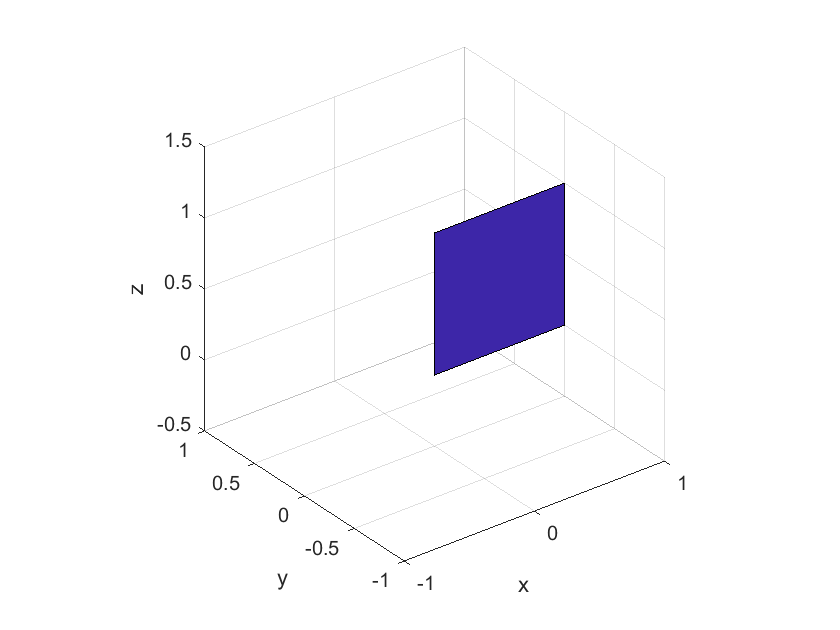

In [1]:
x = [0,1];
z = [0,1];
[X,Z] = meshgrid(x,z);

Y = zeros([2,2]);% a 2x2 matrix of zeros.

surf(X,Y,Z)
xlim([-1,1])
ylim([-1,1])
zlim([-0.5,1.5])
xlabel('x')
ylabel('y')
zlabel('z')
daspect([1,1,1])

We will rotate this square around the $z$ axis.  It is easiest to think of this square in cylindrical coordinates, with an angle $\theta$.

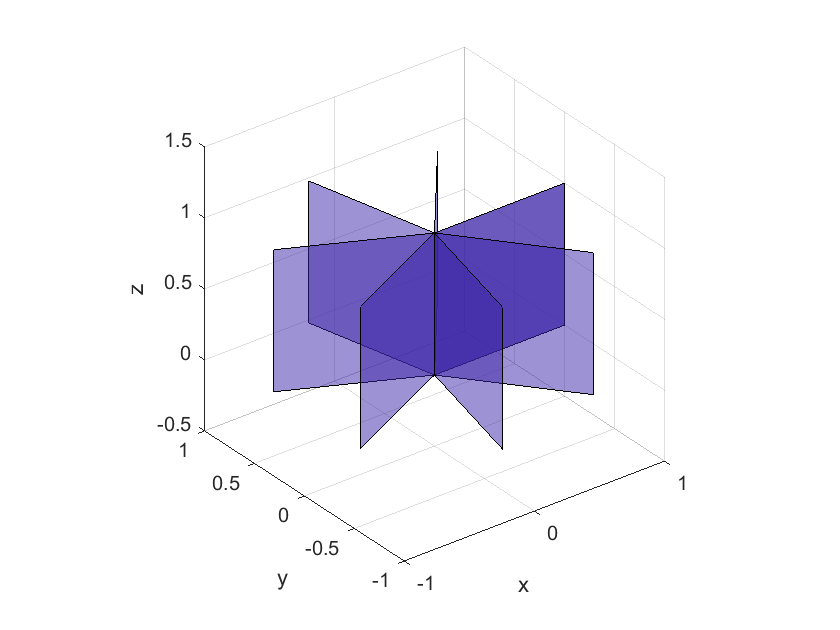

In [2]:
N_squares = 8;
thetas = linspace(0,2*pi,N_squares);
rho = [0,1];
z = [0,1];
[Rho,Z] = meshgrid(rho,z);


for theta = thetas %theta measures the angle of the square with the xz half-plane with x>0.  
   X = cos(theta)*Rho;
   Y = sin(theta)*Rho;
   surf(X,Y,Z, 'FaceAlpha', 0.5)
   hold on
end

xlim([-1,1])
ylim([-1,1])
zlim([-0.5,1.5])
xlabel('x')
ylabel('y')
zlabel('z')
daspect([1,1,1])

Imagine now that we have a fluid flowing in the negative $x$ direction with velocity $\vec{F} = -\vec{i}$.  We want to figure out the total rate of flow through a square with a given value of $\theta$.  We replot this with $\vec{F}$ and with the unit normal vector $n=\vec{e}_\theta$ to each surface, looking down from above.


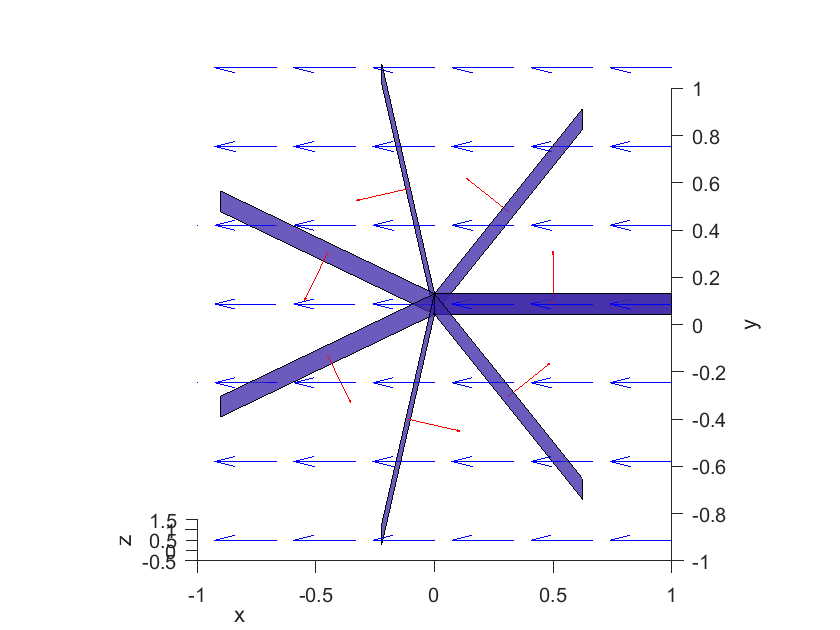

In [3]:
N_squares = 8;
thetas = linspace(0,2*pi,N_squares);
rho = [0,1];
z = [0,1];
[Rho,Z] = meshgrid(rho,z);


for theta = thetas %theta measures the angle of the square with the xz half-plane with x>0.  
   X = cos(theta)*Rho;
   Y = sin(theta)*Rho;
   surf(X,Y,Z, 'FaceAlpha', 0.5)
   
    
   hold on
   normal_vec= [-sin(theta), cos(theta), 0];  
   quiver3(0.5*cos(theta), 0.5*sin(theta), 0.5, normal_vec(1)/4, normal_vec(2)/4, normal_vec(3)/4,'r')   %scaled by 1/4 to make it show up in the plot
end

quiver_x = [-1:1/3:1];
quiver_y = [-1:1/3:1];
quiver_z = 0.5*ones(size(quiver_x));
[QX, QY, QZ] = meshgrid(quiver_x, quiver_y, quiver_z);


quiver3(QX, QY, QZ, -ones(size(QX))/4, zeros(size(QY)), zeros(size(QZ)), 'b')  %scaled by 1/4 to make it consistent in size to normal_vec
xlim([-1,1])
ylim([-1,1])
zlim([-0.5,1.5])
xlabel('x')
ylabel('y')
zlabel('z')
daspect([1,1,1])
view([0,85])
grid off

The question we need to answer is how much of the flow is crossing each of these squares, counting the direction of the normal as positive.  To do this, we need to ask "what is the area of the square, as seen by a viewer looking in the direction of $\vec{F}$?

We switch our view of the region to be looking in the direction of $\vec{F}$.

We will see that although the squares have area one, as viewed from the direction of $\vec{F}$, they appear as rectangles whose area equals the dot product of $\vec{F}$ with the normal vector $\vec{n}$.  Because $\vec{F}$ and $\vec{n}$ are unit vectors, this is the cosine of the angle between $\vec{F}$ and $\vec{n}$.



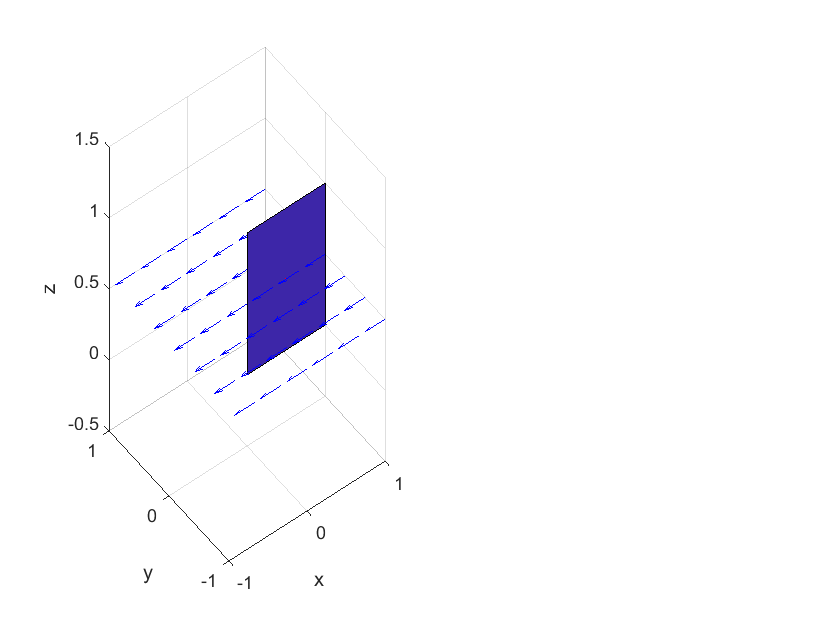

Error using matlab.graphics.axis.Axes/set
Error setting property 'DataAspectRatio' of class 'Axes':
Value must be a 3 element numeric vector

Error in daspect (line 53)
        set(ax,'dataaspectratio',val);

In [4]:
N_squares = 8;
thetas = linspace(0,2*pi,N_squares);
rho = [0,1];
z = [0,1];
[Rho,Z] = meshgrid(rho,z);

quiver_x = [-1:1/3:1];
quiver_y = [-1:1/3:1];
quiver_z = 0.5*ones(size(quiver_x));
[QX, QY, QZ] = meshgrid(quiver_x, quiver_y, quiver_z);



for theta = thetas  %theta measures the angle of the square with the y=0 plane.  
   figure()  %create a brand new figure for each square
    
   X = cos(theta)*Rho;
   Y = sin(theta)*Rho;

   normal_vec= [-sin(theta), cos(theta), 0]; 
   F = [-1,0,0];
   
  
   
   subplot(1,2,1)%plot square with view from above showing vector field
   
    surf(X,Y,Z)  
    hold on
    quiver3(0.5*cos(theta), 0.5*sin(theta), 0.5, normal_vec(1)/4, normal_vec(2)/4, normal_vec(3)/4,'r')   %scaled by 1/4 to make it show up in the plot
    quiver3(QX, QY, QZ, -ones(size(QX))/4, zeros(size(QY)), zeros(size(QZ)), 'b')  %scaled by 1/4 to make it consistent in size to normal_vec

    xlim([-1,1])
    ylim([-1,1])
    zlim([-0.5,1.5])
    xlabel('x')
    ylabel('y')
    zlabel('z')
    daspect([1,1])
    %view([0,60])
    title([' F dot n = ', num2str(dot(F,normal_vec))])
    

    subplot(1,2,2)  %plot square with view in same direction as vector field (from the positive x axis)
    surf(X,Y,Z, 'FaceAlpha', 0.5)
    xlim([-1,1])
    ylim([-1,1])
    zlim([-0.5,1.5])
    xlabel('x')
    ylabel('y')
    zlabel('z')
    daspect([1,1,1])
     view(90,0)   %sets the view from the x-axis
     title('view aligned with F\n (from positive x axis)')
end



More generally given a parallelogram whose sides are $\frac{\partial \vec{r}}{\partial u} \Delta u$ and $\frac{\partial \vec{r}}{\partial v} \Delta v$, the area and a vector field $\vec{F}(u,v)$ which we can approximate as constant over the parallelogram:
- The area of the parallelogram is $\left| \frac{\partial \vec{r}}{\partial u} \times \frac{\partial \vec{r}}{\partial v} \right\| \Delta u \Delta v$
- The unit normal $\vec{n}$ points in the same direction as $ \frac{\partial \vec{r}}{\partial u} \times \frac{\partial \vec{r}}{\partial v}$ (if $u$ and $v$ are chosen appropriately, otherwise we swap their roles).
- The total flux of the vector field across the parallelogram is equal to the area of the parallelogram times the magnitude of the flux times the cosine of the angle between $\vec{F}$ and $\vec{n}$.

Putting this together, the total flux across this parallelogram is 

\begin{align*}
\text{total flux } &= \text{magnitude of }\vec{F} \text{ times apparent area from direction of } \vec{F} \\
&= \| \vec{F} \| \text{ times } \cos(\text{angle between }\vec{F}, \vec{n}) \text{ times area of parallelogram}\\
&= \vec{F} \cdot \vec{n}  \left\| \frac{\partial \vec{r}}{\partial u} \times \frac{\partial \vec{r}}{\partial v} \right\| \Delta u \Delta v    \qquad \qquad \text{recall } \vec{n} \text{ is a unit vector so }   \| \vec{F} \| \cos(\text{angle between }\vec{F}, \vec{n}) = \vec{F} \cdot \vec{n}
\\ 
%\vec{F} \cdot \vec{n} \left\| \frac{\partial \vec{r}}{\partial u} \times \frac{\partial \vec{r}}{\partial v} \right\| \Delta u \Delta v\\
&= \vec{F} \cdot  \left(  \frac{\partial \vec{r}}{\partial u} \times \frac{\partial \vec{r}}{\partial v} \right) \Delta u \Delta v \qquad\qquad \text{recall } \vec{n} \text{ and }  \frac{\partial \vec{r}}{\partial u} \times \frac{\partial \vec{r}}{\partial v} \text{ point in the same direction}
\end{align*}
with a positive value corresponding to flow in the same direction as $\vec{n}$ and a negative value corresponding to flow in the opposite direction.  Taking $\Delta u$ and $\Delta v$ to zero and summing these we arrive at an integral for the flux across $S$.


## Result

Given a surface $S$, a vector field $\vec{F}$, and a direction across $S$ to call 'positive':
We parametrize $S$ so that $ \frac{\partial \vec{r}}{\partial u} \times \frac{\partial \vec{r}}{\partial v}$ points in the positive direction.  Then the flux across the surface is given by

\begin{align*}
\text{total flux across }S &= \iint_S \vec{F} \cdot  \left(  \frac{\partial \vec{r}}{\partial u} \times \frac{\partial \vec{r}}{\partial v} \right) \, du \, dv &= \iint_S \vec{F} \cdot \vec{dS} \quad \text{where } \vec{dS} =  \left( \frac{\partial \vec{r}}{\partial u} \times \frac{\partial \vec{r}}{\partial v} \right) \, du \, dv \\
 &=\iint_S \vec{F} \cdot \vec{n} \left\| \frac{\partial \vec{r}}{\partial u} \times \frac{\partial \vec{r}}{\partial v} \right\|\, du \, dv &= \iint_S \vec{F} \cdot \vec{n} dS \quad \text{where } dS = \left\| \frac{\partial \vec{r}}{\partial u} \times \frac{\partial \vec{r}}{\partial v} \right\| \, du \, dv 
\end{align*}

### Example
Consider a green house shaped like the top half of a sphere of radius $400$cm, using $u$ to be $\theta_{\text{Spherical}}$ and $v$ to be $\phi_{\text{Spherical}}$.  So $0 \leq u \leq \pi/2$ and $0 \leq v \leq 2\pi$.

$$
\vec{r}(u,v) = 400 \cos(u)\vec{i} + 400 \sin(u)\sin(v)\vec{j}  + 400\cos(u) \vec{k}
$$
where $\vec{r}$ is measured in centimeters.

Assume that sunlight shining at the greenhouse is given by $A (\vec{i} - \vec{k})$.  What is the net amount of sunlight going into the greenhouse (counting any that leaves as a negative contribution)?  (assume that it passes straight through glass without refraction/reflection and that if it hits the bottom of the greenhouse it is absorbed.)

With this parametrization, the normal points out of the greenhouse.  So we either swap $u$ and $v$, or simply put a negative sign in front of the integral.

$$
-\iint_S A(\vec{i}  - \vec{k}) \cdot \vec{dS} = 
-\int_0^{2\pi} A(\vec{i}  - \vec{k}) \cdot \left(\frac{\partial \vec{r}}{\partial u} \times \frac{\partial \vec{r}}{\partial v} \right)\, du \, dv
$$

In [5]:
du = pi/4;   #setting the step size in u and v in advance.  This makes it easier to change them 
dv = pi/6;

total_sum = 0
for u = [0:du:pi/2] %this loop does the outer sum over u.  It contains a loop over v inside it.
    inner_sum = 0
    for v = [0:dv:2*pi]   %this loop does the sum over v.  
                          %It should approximate the inner integral over v.
                          %Based on the sum in the cell above, you need to update the next line
        inner_sum = inner_sum + 160000*sin(u)*(sin(u)*cos(v)-cos(u))*dv;
    end
    total_sum = total_sum + inner_sum*du;
end
total_sum

Invalid text character. Check for unsupported symbol, invisible character, or pasting of non-ASCII characters.